In [190]:
import numpy as np
import codecs
import re
import more_itertools as mit
import pandas as pd
from scipy.spatial import distance

**Reading Move actions from trace file**

In [191]:
Move_dic = []
count = 0

with codecs.open("/content/drive/MyDrive/Traffic/OutGPRS150.tr", "r", "UTF8") as inputFile:
    inputFile=inputFile.readlines()
for line in inputFile:
    item = line.split(" ");
    if (item[0] == "M"):
      line_dic = {}
      line_dic['Act'] = item[0]
      line_dic['time'] = float(item[1])
      line_dic['CarNo'] = item[2]
      line_dic['X-axis'] = float(item[3].replace("(", "").replace(",", ""))
      line_dic['Y-axis'] = float(item[4].replace(",", ""))
      line_dic['Speed'] = float(item[5].replace(")", "").replace(",", ""))
      line_dic['X-axis_new'] = float(item[6].replace("(", "").replace(",", ""))
      line_dic['Y-axis_new'] = float(item[7].replace(")", "").replace(",", ""))
      line_dic['NewSpeed'] = float(item[8].replace("\n", ""))
      Move_dic.append(line_dic)
print(Move_dic[1])

{'Act': 'M', 'time': 0.0, 'CarNo': '0', 'X-axis': 1917.64, 'Y-axis': 1403.57, 'Speed': 0.0, 'X-axis_new': 1917.64, 'Y-axis_new': 1403.57, 'NewSpeed': 0.0}


In [192]:
# Remove Duplicate Moves
Move_dic = [dict(t) for t in {tuple(d.items()) for d in Move_dic}]
Move_dic

[{'Act': 'M',
  'CarNo': '73',
  'NewSpeed': 12.81,
  'Speed': 0.0,
  'X-axis': 2537.77,
  'X-axis_new': 2550.57,
  'Y-axis': 472.94,
  'Y-axis_new': 474.3,
  'time': 184.0},
 {'Act': 'M',
  'CarNo': '8',
  'NewSpeed': 18.61,
  'Speed': 0.0,
  'X-axis': 2046.94,
  'X-axis_new': 2028.37,
  'Y-axis': 1125.36,
  'Y-axis_new': 1124.05,
  'time': 34.0},
 {'Act': 'M',
  'CarNo': '53',
  'NewSpeed': 13.67,
  'Speed': 0.0,
  'X-axis': 2702.81,
  'X-axis_new': 2718.6,
  'Y-axis': 1162.47,
  'Y-axis_new': 1163.75,
  'time': 173.0},
 {'Act': 'M',
  'CarNo': '28',
  'NewSpeed': 8.91,
  'Speed': 0.0,
  'X-axis': 1934.19,
  'X-axis_new': 1940.63,
  'Y-axis': 731.53,
  'Y-axis_new': 735.64,
  'time': 48.0},
 {'Act': 'M',
  'CarNo': '35',
  'NewSpeed': 8.71,
  'Speed': 0.0,
  'X-axis': 2200.32,
  'X-axis_new': 2201.22,
  'Y-axis': 1460.92,
  'Y-axis_new': 1452.26,
  'time': 111.0},
 {'Act': 'M',
  'CarNo': '67',
  'NewSpeed': 12.62,
  'Speed': 0.0,
  'X-axis': 2170.79,
  'X-axis_new': 2172.08,
  'Y-ax

In [193]:
X = [i for i in Move_dic if i['CarNo'] == '59']
X

[{'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 13.19,
  'Speed': 0.0,
  'X-axis': 1991.13,
  'X-axis_new': 1978.01,
  'Y-axis': 741.17,
  'Y-axis_new': 739.59,
  'time': 89.0},
 {'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 13.01,
  'Speed': 0.0,
  'X-axis': 1932.32,
  'X-axis_new': 1931.57,
  'Y-axis': 954.01,
  'Y-axis_new': 967.03,
  'time': 109.0},
 {'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 0.0,
  'Speed': 0.0,
  'X-axis': 2259.42,
  'X-axis_new': 2259.42,
  'Y-axis': 772.45,
  'Y-axis_new': 772.45,
  'time': 65.0},
 {'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 11.81,
  'Speed': 0.0,
  'X-axis': 2295.5,
  'X-axis_new': 2296.62,
  'Y-axis': 481.9,
  'Y-axis_new': 470.14,
  'time': 186.0},
 {'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 13.59,
  'Speed': 0.0,
  'X-axis': 2271.5,
  'X-axis_new': 2272.79,
  'Y-axis': 733.91,
  'Y-axis_new': 720.38,
  'time': 167.0},
 {'Act': 'M',
  'CarNo': '59',
  'NewSpeed': 13.56,
  'Speed': 0.0,
  'X-axis': 2198.6,
  'X-axis_new': 2185.15,
  'Y-axis': 76

**Read Junction values from file**

In [194]:
Junc_dics = []
count2 = 0
Junction = ''

with codecs.open("/content/drive/MyDrive/Traffic/Junction Position.txt", "r", "UTF8") as inputFile:
    inputFile=inputFile.readlines()
for line in inputFile:
    item = line.split(" ");
    if (item[0] == Junction and item[2] == 'Y_'):
      line_dic['Y'] = float(item[3].replace("\r\n", ""))
      
      Junc_dics.append(line_dic)
    else:
      line_dic = {}
      line_dic['Junction'] = item[0]
      line_dic['X'] = float(item[3].replace("\r\n", ""))
      
      Junction = item[0]
print(Junc_dics)

[{'Junction': '$junction(1)', 'X': 1885.0, 'Y': 1764.0}, {'Junction': '$junction(2)', 'X': 2167.0, 'Y': 1797.0}, {'Junction': '$junction(3)', 'X': 2429.0, 'Y': 1821.0}, {'Junction': '$junction(4)', 'X': 2708.0, 'Y': 1849.0}, {'Junction': '$junction(5)', 'X': 1908.0, 'Y': 1406.0}, {'Junction': '$junction(6)', 'X': 2198.0, 'Y': 1435.0}, {'Junction': '$junction(7)', 'X': 2469.0, 'Y': 1465.0}, {'Junction': '$junction(8)', 'X': 2746.0, 'Y': 1490.0}, {'Junction': '$junction(9)', 'X': 1917.0, 'Y': 1114.0}, {'Junction': '$junction(10)', 'X': 2233.0, 'Y': 1142.0}, {'Junction': '$junction(11)', 'X': 2500.0, 'Y': 1163.0}, {'Junction': '$junction(12)', 'X': 2777.0, 'Y': 1185.0}, {'Junction': '$junction(13)', 'X': 1933.0, 'Y': 723.0}, {'Junction': '$junction(14)', 'X': 2270.0, 'Y': 772.0}, {'Junction': '$junction(15)', 'X': 2534.0, 'Y': 801.0}, {'Junction': '$junction(16)', 'X': 2811.0, 'Y': 829.0}, {'Junction': '$junction(17)', 'X': 1961.0, 'Y': 418.0}, {'Junction': '$junction(18)', 'X': 2299.0, '

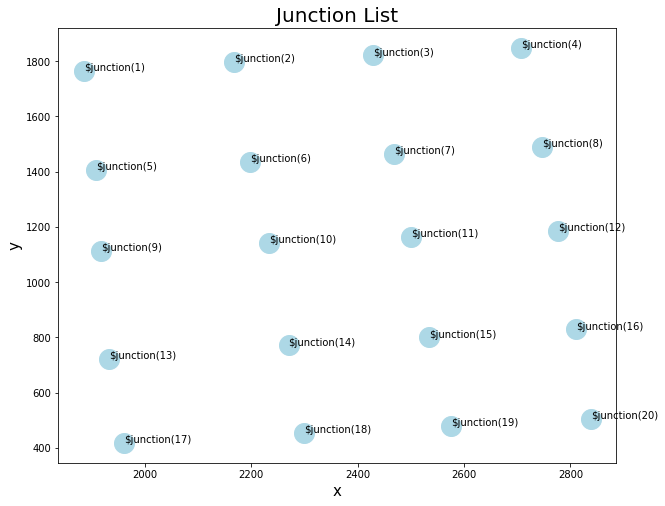

In [195]:
%matplotlib inline
import random
import sys
import array
import matplotlib.pyplot as plt

X = [i['X'] for i in Junc_dics]
Y = [i['Y'] for i in Junc_dics]
Label = [i['Junction'] for i in Junc_dics]

# display scatter plot data
plt.figure(figsize=(10,8))
plt.title('Junction List', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(X, Y, marker = 'o',s=400, c='lightblue')

# add labels
for label, x, y in zip(Label, X, Y):
    plt.annotate(label, xy = (x, y))

**Streets Length**

In [196]:
def StreetLength(j1, j2):
  Junc1 = [i for i in Junc_dics if i['Junction'] == j1]
  Junc2 = [i for i in Junc_dics if i['Junction'] == j2]
  a = (Junc1[0]['X'], Junc1[0]['Y'], 0)
  b =  (Junc2[0]['X'], Junc2[0]['Y'], 0)
  Dist_Street = distance.euclidean(a, b)
  return Dist_Street

**List of a street cars**

In [197]:
def CarCount(j1, j2, Horizontal = True):
  if Horizontal:
    Junc1 = [i for i in Junc_dics if i['Junction'] == j1]
    Junc2 = [i for i in Junc_dics if i['Junction'] == j2]
    Car_count = [i for i in Move_dic if i['X-axis'] >= Junc1[0]['X'] and i['Y-axis'] >= Junc1[0]['Y']
                  and i['X-axis'] < Junc2[0]['X'] and i['Y-axis'] < Junc2[0]['Y']]
    Car_count = sorted(Car_count, key=lambda d: d['time'])
  else:
    Junc1 = [i for i in Junc_dics if i['Junction'] == j1]
    Junc2 = [i for i in Junc_dics if i['Junction'] == j2]
    Car_count = [i for i in Move_dic if i['X-axis'] >= Junc1[0]['X'] and i['Y-axis'] <= Junc1[0]['Y']
                  and i['X-axis'] < Junc2[0]['X'] and i['Y-axis'] > Junc2[0]['Y']]
    Car_count = sorted(Car_count, key=lambda d: d['time'])
  return Car_count

**Cars speed mean value**

In [198]:
def MeanSpeed(CarList):
  if len(CarList) > 0:
    Mean_speed= float(sum(d['NewSpeed'] for d in CarList)) / len(CarList)
    return Mean_speed
  return 0

**Calculate CTT Value**

In [199]:
def CalCTT(StreetLength, MeanSpeed):
  if MeanSpeed > 0:
    CTT = StreetLength / MeanSpeed
    return CTT
  return 0

**Calculate pspot**

In [200]:
WorkZone = 1
Incident = 2
StoredEvent = 3

In [201]:
def CalPSpot(CarList):
  unique_cars = [list(set(d['CarNo'] for d in CarList))]
  WorkzoneJunc = 0
  InczoneJunc = 0
  StrzoneJunc = 0
  for i in range(len(unique_cars[0])):
    selectedcar =  [dict(k) for k in CarList if k['CarNo'] == unique_cars[0][i] ]
    if len(selectedcar) > 2 :
      timesorted = [p['time'] for p in sorted(selectedcar, key=lambda d: d['time'])]
      consecutive_groups = [list(group) for group in mit.consecutive_groups(timesorted)]
      if len(consecutive_groups[0]) > 3 :
        WorkzoneJunc = WorkzoneJunc + 1
      elif len(consecutive_groups[0]) <= 3 & len(consecutive_groups[0]) > 1 :
        InczoneJunc = InczoneJunc+1
  if WorkzoneJunc == len(unique_cars[0]):
    return WorkZone
  elif InczoneJunc == len(unique_cars[0]):
    return Incident
  else:
    return StoredEvent


**Calculate TGap**

In [202]:
def calTGap(CarList):
  unique_time = sorted(set(d['time'] for d in CarList))
  Threshold = 10
  TGap = 0
  for i in range(len(unique_time)):
    carList =  [k['CarNo'] for k in CarList if k['time'] == unique_time[i] ] 
    if len(carList) > 0:
      for j in range(len(carList)):
        for k in range(len(carList)):
          car1 =  [p for p in CarList if p['CarNo'] == carList[j] and p['time'] == unique_time[i] ] 
          car2 =  [p for p in CarList if p['CarNo'] == carList[k] and p['time'] == unique_time[i]  ] 
          a = (car1[0]['X-axis'], car1[0]['Y-axis'], 0)
          b =  (car2[0]['X-axis'], car2[0]['Y-axis'], 0)
          Dist_cars = distance.euclidean(a, b)
          if Dist_cars > Threshold:
            TGap = 1
            return TGap 
  return TGap

**Calculate TSpeed**

In [203]:
def calTSpeed(CarList, StreetSpeed):
  unique_cars = [list(set(d['CarNo'] for d in CarList))]
  TSpeed = 0
  for i in range(len(unique_cars[0])):
    selectedcar =  [dict(k) for k in CarList if k['CarNo'] == unique_cars[0][i] ]
    CarMeanSpeed =  sum(d['NewSpeed'] for d in selectedcar) / len(selectedcar)
    if CarMeanSpeed < StreetSpeed:
      TSpeed = 1
      return TSpeed
  return TSpeed

**Calculate impactRegion**

In [204]:
outSide = 1
inside = 0

In [205]:
def calImpactRegion(CarList, streetlength):
  unique_time = sorted(set(d['time'] for d in CarList))
  Threshold = streetlength/50
  for i in range(len(unique_time)):
    carList =  [k for k in CarList if k['time'] == unique_time[i] ] 
    if len(carList) > 1:
      if len(carList) >  Threshold:
        return outSide
  return inside

**Create Street dataframe**

In [206]:
Horizontal_Streets_avgSpeed = np.zeros((5,3))
Horizontal_Streets_avgSpeed[0][0] = 9.4
Horizontal_Streets_avgSpeed[0][1] = 8.7
Horizontal_Streets_avgSpeed[0][2] = 9.3
Horizontal_Streets_avgSpeed[1][0] = 9.6
Horizontal_Streets_avgSpeed[1][1] = 9.03
Horizontal_Streets_avgSpeed[1][2] = 9.2
Horizontal_Streets_avgSpeed[2][0] = 10.53
Horizontal_Streets_avgSpeed[2][1] = 8.9
Horizontal_Streets_avgSpeed[2][2] = 9.23
Horizontal_Streets_avgSpeed[3][0] = 11.23
Horizontal_Streets_avgSpeed[3][1] = 8.8
Horizontal_Streets_avgSpeed[3][2] = 9.23
Horizontal_Streets_avgSpeed[4][0] = 11.26
Horizontal_Streets_avgSpeed[4][1] = 9.2
Horizontal_Streets_avgSpeed[4][2] = 8.8
Horizontal_Streets_avgSpeed

array([[ 9.4 ,  8.7 ,  9.3 ],
       [ 9.6 ,  9.03,  9.2 ],
       [10.53,  8.9 ,  9.23],
       [11.23,  8.8 ,  9.23],
       [11.26,  9.2 ,  8.8 ]])

In [207]:
Vertical_Streets_avgSpeed = np.zeros((4,4))
Vertical_Streets_avgSpeed[0][0] = 10.04
Vertical_Streets_avgSpeed[0][1] = 9.73
Vertical_Streets_avgSpeed[0][2] = 13.03
Vertical_Streets_avgSpeed[0][3] = 10.16
Vertical_Streets_avgSpeed[1][0] = 9.5
Vertical_Streets_avgSpeed[1][1] = 9.76
Vertical_Streets_avgSpeed[1][2] = 12.33
Vertical_Streets_avgSpeed[1][3] = 10.6
Vertical_Streets_avgSpeed[2][0] = 12.16
Vertical_Streets_avgSpeed[2][1] = 10.06
Vertical_Streets_avgSpeed[2][2] = 12.06
Vertical_Streets_avgSpeed[2][3] = 10.73
Vertical_Streets_avgSpeed[3][0] = 11.96
Vertical_Streets_avgSpeed[3][1] = 10.16
Vertical_Streets_avgSpeed[3][2] = 11.86
Vertical_Streets_avgSpeed[3][3] = 10.8
Vertical_Streets_avgSpeed

array([[10.04,  9.73, 13.03, 10.16],
       [ 9.5 ,  9.76, 12.33, 10.6 ],
       [12.16, 10.06, 12.06, 10.73],
       [11.96, 10.16, 11.86, 10.8 ]])

In [208]:
streetdf = pd.DataFrame(columns=['StreetName', 'Length', 'CarCount', 'CTT', 'PSpot', 'TGap', 'TSpeed', 'ImpactRegion'])
for i in range(5):
  for j in range(1,4):
    StreetName = 'street' + str(i*4 + j) + str(i*4 + j+1)
    j1 = str('$junction('+str(i*4 + j)+')')
    j2 = '$junction('+str(i*4 + j+1)+')'
    CarList = CarCount(j1,j2)
    Length = StreetLength(j1,j2)
    carcount =  len([list(set(d['CarNo'] for d in CarCount(j1,j2)))][0])
    meanspeed = MeanSpeed(CarList)
    CTT = CalCTT(Length,meanspeed )
    PSpot = CalPSpot(CarList)
    TGap = calTGap(CarList)
    TSpeed = calTSpeed(CarList,Horizontal_Streets_avgSpeed[i][j-1])
    ImpactRegion = calImpactRegion(CarList, Length)
    streetdf = streetdf.append({'StreetName': StreetName, 'Length':Length, 'CarCount': carcount,
                                'CTT': CTT, 'PSpot':PSpot, 'TGap':TGap, 'TSpeed':TSpeed, 'ImpactRegion':ImpactRegion}, ignore_index=True)
    

for i in range(4):
  for j in range(1,5):
    StreetName = 'street' + str(i*4 + j) + str(i*4 + j+4)
    j1 = str('$junction('+str(i*4 + j)+')')
    j2 = '$junction('+str(i*4 + j+4)+')'
    CarList = CarCount(j1,j2,False)
    Length = StreetLength(j1,j2)
    carcount =  len([list(set(d['CarNo'] for d in CarList))][0])
    meanspeed = MeanSpeed(CarList)
    CTT = CalCTT(Length,meanspeed )
    PSpot = CalPSpot(CarList)
    TGap = calTGap(CarList)
    TSpeed = calTSpeed(CarList,Vertical_Streets_avgSpeed[i][j-1])
    ImpactRegion = calImpactRegion(CarList, Length)
    streetdf = streetdf.append({'StreetName': StreetName, 'Length':Length, 'CarCount': carcount,
                                'CTT': CTT, 'PSpot':PSpot, 'TGap':TGap, 'TSpeed':TSpeed, 'ImpactRegion':ImpactRegion}, ignore_index=True)
streetdf

,StreetName,Length,CarCount,CTT,PSpot,TGap,TSpeed,ImpactRegion
0,street12,283.924286,21,23.504001,3,1,1,0
1,street23,263.096940,31,20.867577,3,1,1,1
2,street34,280.401498,20,22.734560,3,1,1,0
3,street56,291.446393,14,23.602704,3,1,1,0
4,street67,272.655460,32,29.023911,3,1,1,1
5,street78,278.125871,9,24.748033,3,1,1,0
6,street910,317.238081,44,22.669594,3,1,1,0
7,street1011,267.824569,42,22.064135,3,1,1,1
8,street1112,277.872273,21,21.861502,1,1,1,1
9,street1314,340.543683,35,27.594243,3,1,1,1


**Classification Tree**

In [209]:
#  ClassTypes
Normal = 0
Incident = 1
WorkZone = 2
SpecialEvent =3 
Weather = 4
Recurrent = 5
streetdf['ClassType'] = 0

In [210]:
for i in range(streetdf.shape[0]):
  # checking CTT value 
  if streetdf.iloc[i][3] < 2:
    streetdf.iloc[i,8] = Normal  
  else:
    # Checking PSpot
    if streetdf.iloc[i][4] == 1:
      streetdf.iloc[i, 8] = WorkZone
    elif streetdf.iloc[i][4] == 2:
      streetdf.iloc[i,8] = Incident
    else:
      # Checking ImpactRegion
      if streetdf.iloc[i][7] == 1:
        # Checking TGAP
        if streetdf.iloc[i][5] == 1:
          # Checking TSpeed
          if streetdf.iloc[i][6] == 1:
            streetdf.iloc[i,8] = SpecialEvent
          else:
            streetdf.iloc[i][8] = Weather
        else:
          if streetdf.iloc[i][6] == 1:
            streetdf.iloc[i,8] = Recurrent
          else:
            streetdf.iloc[i,8] = Weather
      else:
        # Checking TSpeed
        if streetdf.iloc[i][6] == 1:
          # Checking TGAP
          if streetdf.iloc[i][5] == 1:
            streetdf.iloc[i,8] = Recurrent
          else:
            streetdf.iloc[i,8] = Weather
        else:
          streetdf.iloc[i,8] = Weather

In [211]:
streetdf

,StreetName,Length,CarCount,CTT,PSpot,TGap,TSpeed,ImpactRegion,ClassType
0,street12,283.924286,21,23.504001,3,1,1,0,5
1,street23,263.096940,31,20.867577,3,1,1,1,3
2,street34,280.401498,20,22.734560,3,1,1,0,5
3,street56,291.446393,14,23.602704,3,1,1,0,5
4,street67,272.655460,32,29.023911,3,1,1,1,3
5,street78,278.125871,9,24.748033,3,1,1,0,5
6,street910,317.238081,44,22.669594,3,1,1,0,5
7,street1011,267.824569,42,22.064135,3,1,1,1,3
8,street1112,277.872273,21,21.861502,1,1,1,1,2
9,street1314,340.543683,35,27.594243,3,1,1,1,3
